# Decision Tree Case Study
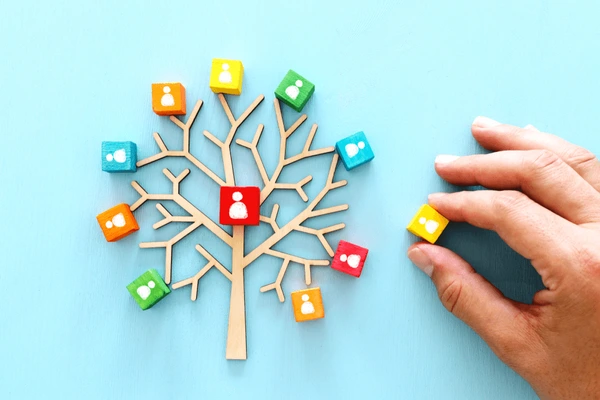

# Heart Disease Prediction


## Business Problem - Background

- Heart disease and stroke can be fatal, but they can also cause major sickness, disability, and a reduction in life quality. A stroke can result in substantial handicap, including paralysis, speech problems, and emotional issues.

- Individuals who have had a heart attack usually experience exhaustion and despair and they may find it difficult to engage in physical activity.

- Heart disease and stroke are two of the most common and costly health concerns worldwide today. On a personal level, families dealing with heart disease or stroke face not just medical expenditures, but also missed wages and the possibility of a lower standard of life.

- Heart disease kills roughly the same number of people each year as cancer, lower respiratory diseases (including pneumonia), and accidents combined. Heart disease and stroke cost the nation an estimated $316.6 billion in health care costs and lost productivity in 2011

- Healthcare companies collect a lot of historical data pertaining to these chronicdiseases. These datasets can be leveraged to train machine learning algorithms and learn from the history which eventually will help in predicting such chronic conditions in patients


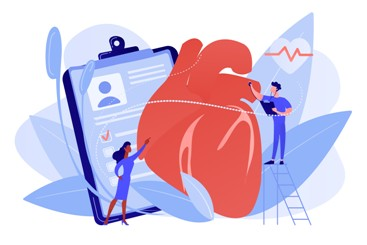

# Importing the Libaries 

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree   # >> to implement decision tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report#>> to check the performance of the model
import warnings
warnings.filterwarnings("ignore")


# Dataset Explained


**Data contains**:-

**age - age in years**

**sex - (1 = male; 0 = female)**

**cp - chest pain type**

**trestbps - resting blood pressure (in mm Hg on admission to the hospital)**

**chol - serum cholestoral in mg/dl**

**fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)**

**restecg - resting electrocardiographic results**

**thalach - maximum heart rate achieved**

**exang - exercise induced angina (1 = yes; 0 = no)**

**oldpeak - ST depression induced by exercise relative to rest**

**slope - the slope of the peak exercise ST segment**

**ca - number of major vessels (0-3) colored by flourosopy**

**thal - 3 = normal; 6 = fixed defect; 7 = reversable defect**

 **target - have disease or not (1=yes, 0=no)**


# Exploratory Data Analysis

# Loading the Dataset

In [2]:
df=pd.read_csv('heart-1 (1).csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Exploration

In [3]:
# checking no of rows and columns in the dataset

df.shape

(303, 14)

In [4]:
 # people having cholestrol greater than 300
    
df[df['chol']>300].shape 

(43, 14)

In [5]:
# unique values in thal column

df['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

In [6]:
# normal people wrt thal column

f=df[df['thal']==2]
f

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0


In [7]:
# people having thal = normal and having heart disease 

f[f['target']==1].shape

(130, 14)

**inference:- it means thal column is not direactly effecting persons heart health**

In [8]:
# to check null values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# to check the datatype of columns

df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
# provides overview about the dataset

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Text(0.5, 1.0, 'Age Distribustion')

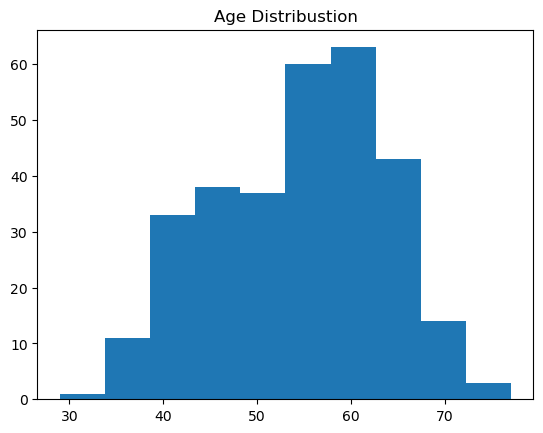

In [11]:
# plotting of age distributions

df['age'].hist(grid=False,bins=10);
plt.title('Age Distribustion')


**In the above graph, we can analyse the distribution of Age column, and we can say that there are 60+ people who are having age between 57 to 63.**

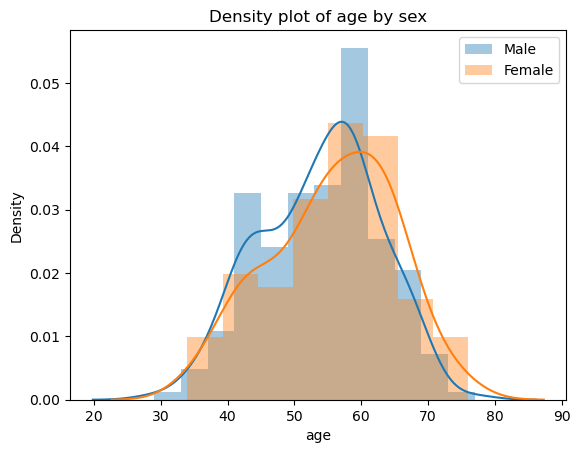

In [12]:
# check the distribution of age by sex

sns.distplot(df[df['sex']==1]['age'],label='Male')
sns.distplot(df[df['sex']==0]['age'],label='Female')
plt.legend()
plt.title('Density plot of age by sex')
plt.show()

**Density graph shows the smoothed distribution of points along the numerical axis. The density peaks where there is the highest concentration of points. In sum, density graphs can be considered smoothed histograms.**

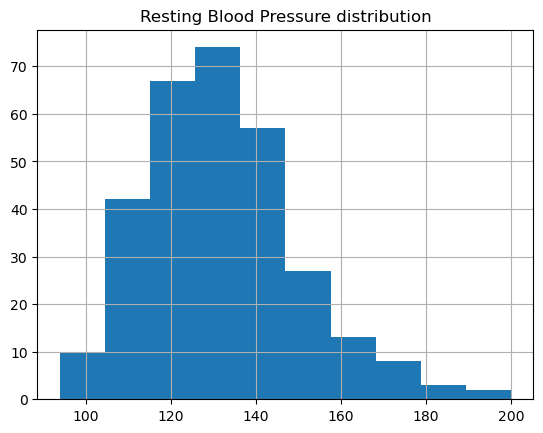

In [13]:
# plotting frequency for trestbps column

df['trestbps'].hist()
plt.title('Resting Blood Pressure distribution')
plt.show()

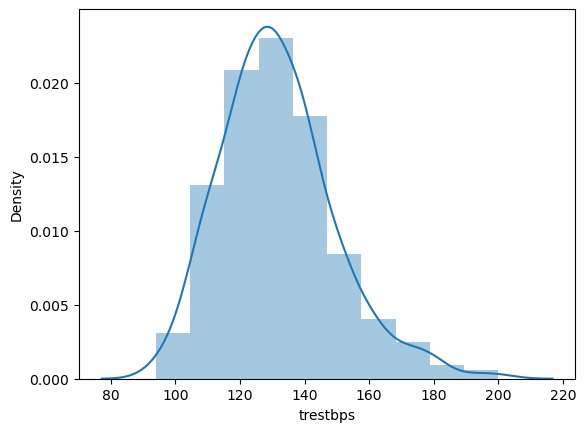

In [14]:
sns.distplot(df['trestbps'],bins=10)
plt.show()

  ##### In the graph above we are having a normal distribution 

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: xlabel='oldpeak'>

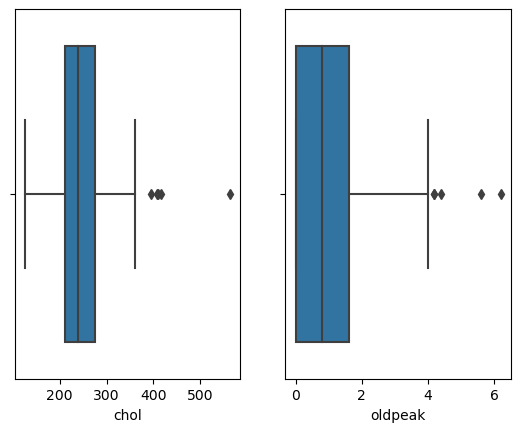

In [16]:
#plotting boxplot to see the outliers 

fig,axes=plt.subplots(nrows=1,ncols=2)
sns.boxplot(x='chol',data=df,orient='v',ax=axes[0])
sns.boxplot(x='oldpeak',data=df,orient='v',ax=axes[1])

In [19]:
#checking Outliers for the numerical data 



In [17]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

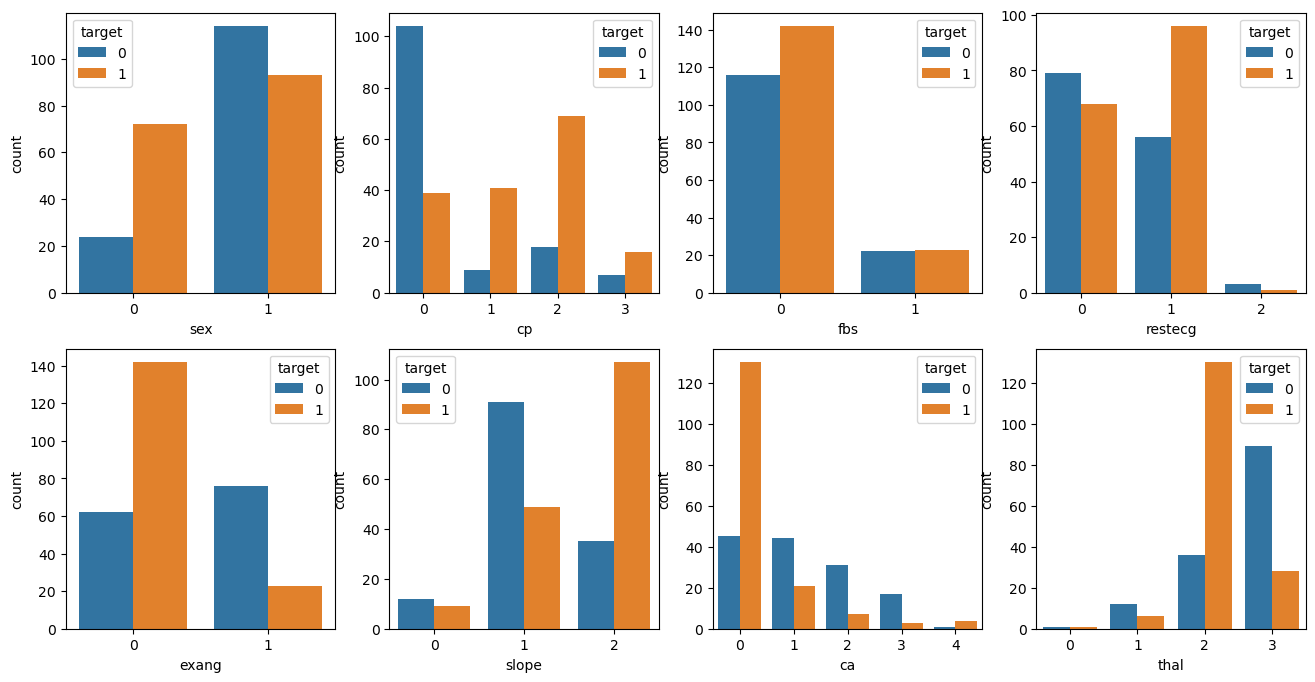

In [18]:
fig,axes=plt.subplots(nrows=2,ncols=4,figsize=(16,8))
cat_feat=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for x,feature in enumerate(cat_feat):
    if feature!='target':
        ax=axes[int(x/4),x%4]
        sns.countplot(x=feature,hue='target',data=df,ax=ax)

**Let's get some insights frm this chart:**

**Chest pain: the heart disease diagnosis is greater among the patients that feel any chest pain.**

**Restecg - Eletrocardiagraph results: the rate of heart disease diagnoses higher for patients with a ST-T wave abnormality**

**Slope: The ratio of patients diagnosed with heart disease is higher for slope = 2**

**Ca: The diagonosed ratio decreases fo ca between 1 and 3.**

**Thal: the diagnosed ratio is higher for thal = 2.**

# Feature Selection 

In [32]:
# correlation

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


**As data collected from after consedering domian knowledge we are having Every column is significant so feature selection is not really important here we would not go for feature selection**

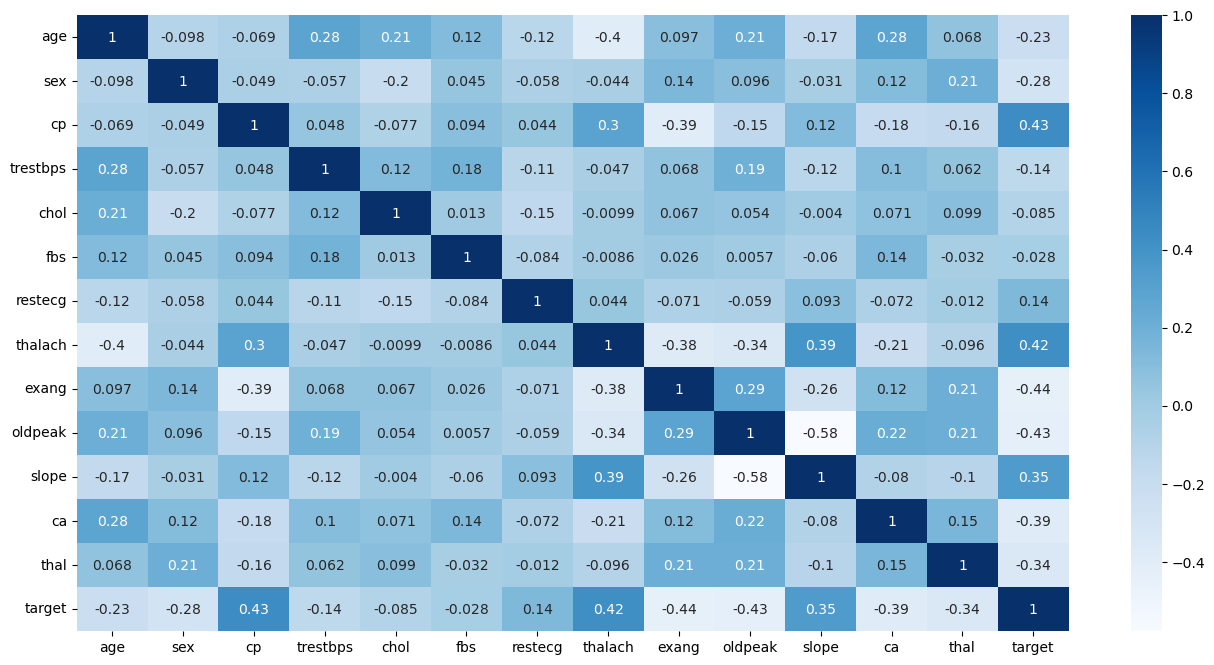

In [31]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

**Apparently there are no features with a pretty strong correlation (above |0.7|)**

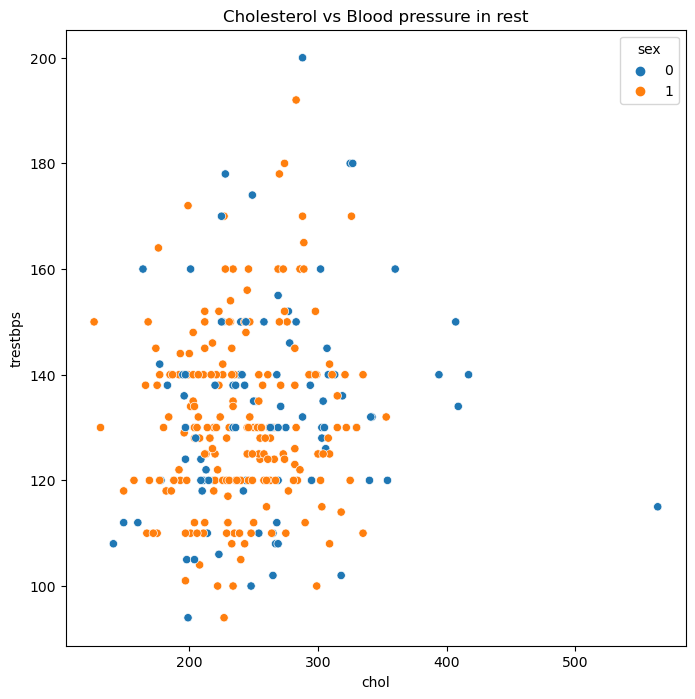

In [35]:
plt.rcParams['figure.figsize']=(8,8)  # to customize the figure size and parameters before actually creating a plot
sns.scatterplot(x='chol',y='trestbps',hue='sex',data=df)
plt.title('Cholesterol vs Blood pressure in rest')
plt.show()

# Data Preparation (features and target)


In [37]:
X=df.drop('target',axis=1) # independent variable
y=df['target'] # dependent variable
print(X.shape)
print(y.shape)

(303, 13)
(303,)


# Splitting the Data

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)
print(X_train.shape)
print(X_test.shape)

(212, 13)
(91, 13)


# Model Creation

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
# or we can write this as well >> from sklearn.tree import DecisionTreeClassifier >>> clf=DecisionTreeClassifier()

clf=tree.DecisionTreeClassifier()

# Model Training

In [42]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

# Prediction

In [47]:
#prediction with training data

y_train_pred=clf.predict(X_train)

In [44]:
#prediction with testing data

y_test_pred=clf.predict(X_test)

In [45]:
y_train_pred


array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [46]:
y_test_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

# Checking the accuracy of model

In [49]:
# helper function #domain is wether for training or testing specifically what data we are checking on

def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf=confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,cmap='Blues',fmt='g') # for g and G maximum no. of significant digits
    plt.show()
    

In [53]:
print(f'Train Score {accuracy_score(y_train_pred,y_train)}')
print(f'Test Score {accuracy_score(y_test_pred,y_test)}')

Train Score 1.0
Test Score 0.7142857142857143


Train Confusion matrix


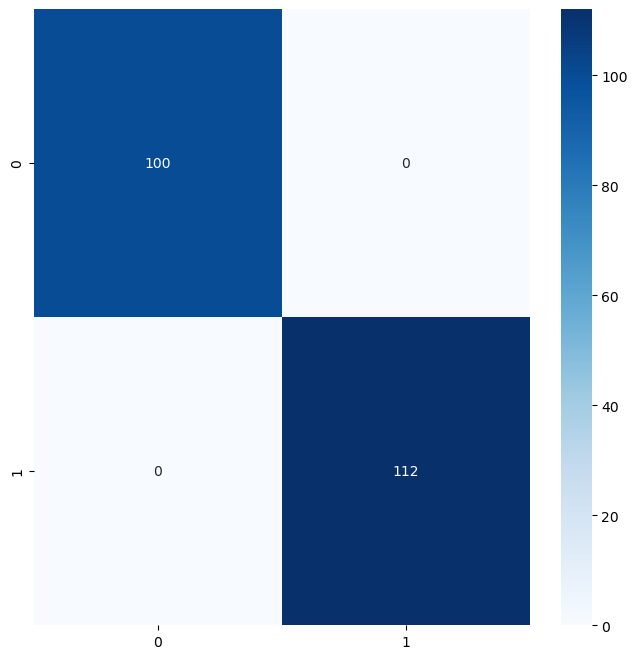

Test Confusion matrix


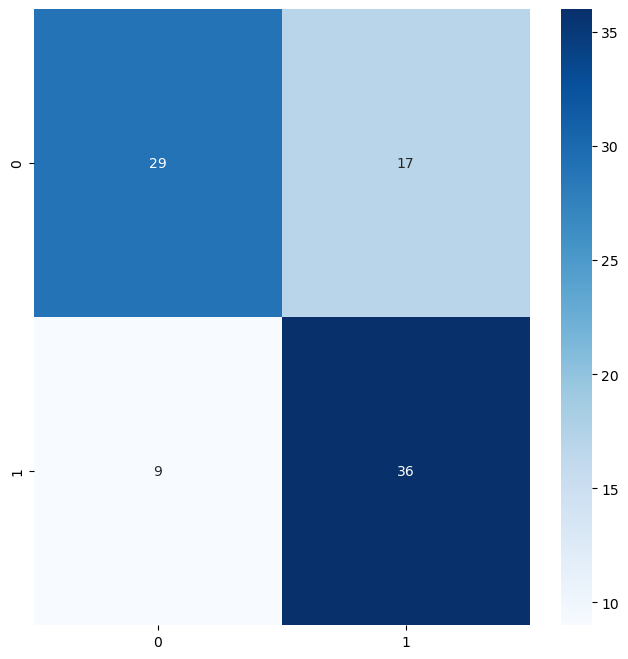

In [56]:
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

# Classification report

In [59]:

# supportis to know the value count fot 0 and 1 to identify the imbalanced data

print(classification_report(y_test_pred,y_test)) 

              precision    recall  f1-score   support

           0       0.76      0.63      0.69        46
           1       0.68      0.80      0.73        45

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71        91
weighted avg       0.72      0.71      0.71        91



# Hyperparameter tuning for decision tree

### it is used to make the model better by providing certain specifications

##### accuracy after tuning=73% , accuracy before tuning=71%

In [79]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score


In [98]:
# craete A DecisionTreeClassifier

clf1=DecisionTreeClassifier(random_state=42)

In [99]:
#Define a range of hyperparameters to searchover

p_grid={
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,3],
    'max_features':['auto','sqrt','log2'],
}

In [100]:
# create a GridSearchCV object with cross-validation

grid_search=GridSearchCV(estimator=clf1,param_grid=p_grid,cv=5,scoring='accuracy')

In [101]:
# Perform the grid search to find the best hyperparameters

grid_search.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [102]:
# Get the best hyperparameters

best_params=grid_search.best_params_
best_params

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 10}

# Create a DecisionTreeClassifier with the best hyperparameters

In [103]:
best_clf=DecisionTreeClassifier(random_state=0,**best_params) # ** keyword arg

## Fit the best model to the training data

best_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_features='auto', min_samples_leaf=3,
                       min_samples_split=10, random_state=0)

In [104]:
# Make predictions on the test data using the best model

y_test_pred=best_clf.predict(X_test)

In [105]:
# Calculate the confusion matrix for test data

cm_test=confusion_matrix(y_test,y_test_pred)

cm_test

array([[25, 13],
       [11, 42]], dtype=int64)

<Figure size 800x600 with 0 Axes>

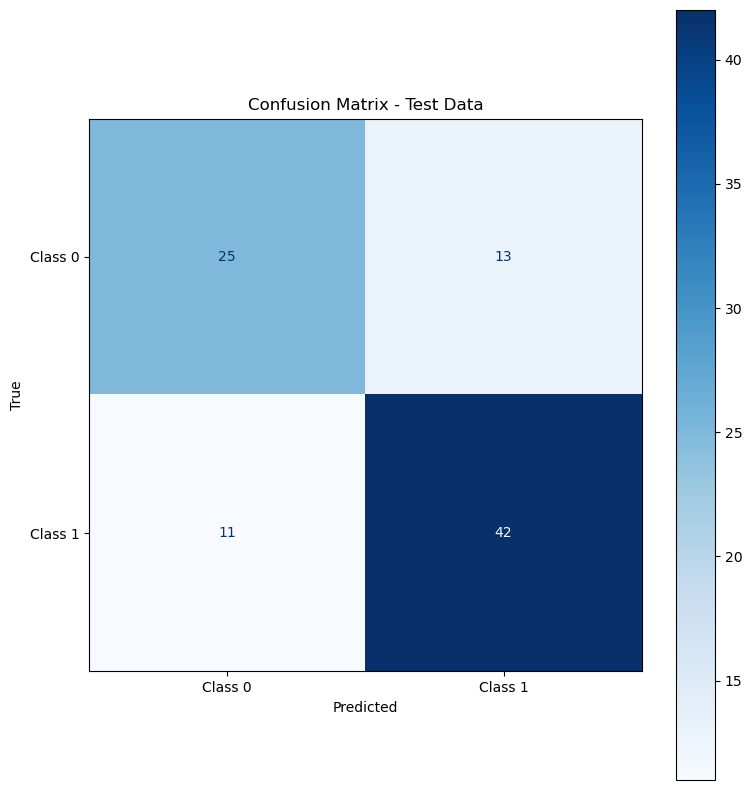

Accuracy on Test Data: 0.7362637362637363


In [106]:
# Create a function to plot the confusion matrix with actual counts
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=cmap, values_format='d')  # Use values_format='d' to display actual counts
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()

# Define class labels if not already defined
class_labels = ['Class 0', 'Class 1']

# Plot the confusion matrix for test data
plot_confusion_matrix(cm_test, classes=class_labels, title='Confusion Matrix - Test Data')

plt.show()

from sklearn.metrics import accuracy_score

# Calculate the accuracy on the test data
accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy
print("Accuracy on Test Data:", accuracy)